# Exploratory Analysis of Real Estate News Data

## Setup

In [1]:
import pandas as pd
import numpy as np
import os, sys
import json
from dotenv import find_dotenv, load_dotenv
from datetime import datetime

In [2]:
with open("../src/config.json", "r") as f:
    cfg = json.load(f)
    
df = pd.read_pickle("../data/interim/structured_data_20190302.pickle")

df["published_period"] = df["published"].dt.to_period("M").astype(str)
df.head(5)

,feedTitle,author,published,engagement,title,fileID,published_period
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e,Immonews RSS Feed,Fotolia.de / nmann77,2015-09-23 22:35:20.879,7,24.09.2015 - Politik & Wirtschaft: Haus & Grun...,1,2015-09
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_15994eb4e80:6bb50cc:1e99f69f,Immonews RSS Feed,Fotolia.de / 2xwilfinger,2017-01-12 23:02:46.144,17,13.01.2017 - Leben & Wohnen: Ausnahme beim Win...,2,2017-01
hu94UCg3vuxifOgio/b16czFOOJs9C7thvt+mklFm78=_15f5873f95f:9d862cf:4d363ef0,RETN - Real Estate Tech News,Lindsey Imperatore,2017-10-26 11:30:00.000,1,Exclusive Q&A With #RETAS Sponsor Glenn Murray...,3,2017-10
pAll0y5reb9EOfInG4eisUIzkoZc4xCx0HyK02/6FhU=_1436d43bf75:11670829:d7247628,Property Management Insider,Greg Willett,2014-01-07 15:50:04.000,14,Will Oakland’s Apartment Market Lead the Way i...,4,2014-01
xWDIGZBMt8xnhnzyNkukvtkIAR2mBD5dsDLzMT+azN4=_16204a07f50:21ee66:4e6e6075,PropTech News,proptechnews,2018-03-08 08:00:50.000,0,"Mehr, mehr, mehr PropTech",5,2018-03


## Time of Publication

In [3]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

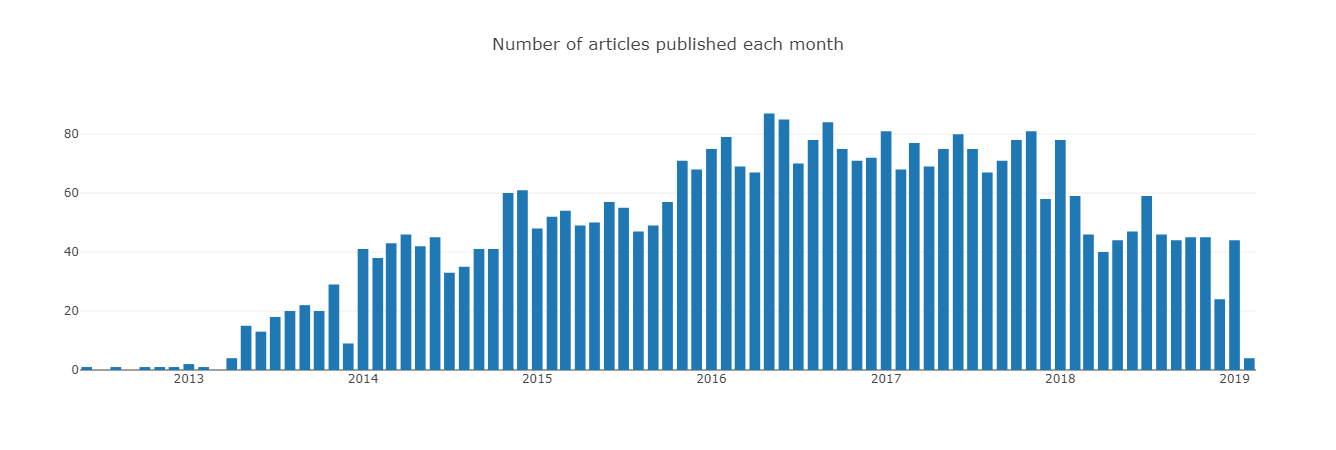

In [4]:
plotData = df.groupby("published_period")
plotData = plotData.count().reset_index()

p = [go.Bar(x=plotData["published_period"], y=plotData["published"])]
l = go.Layout(title = "Number of articles published each month")
plotly.offline.iplot({"data": p, "layout":l})

Most articles were published between 2016 and 2018


## Sources

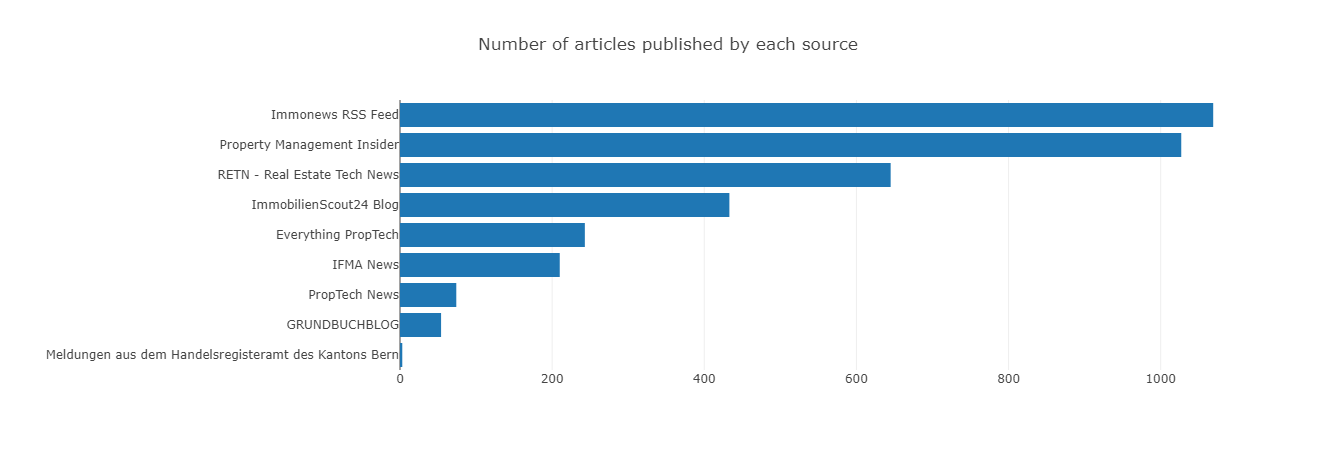

In [6]:
plotData = df.groupby("feedTitle")
plotData = plotData.count().reset_index().sort_values(["published_period"])


p = [go.Bar(x=plotData["published"], y=plotData["feedTitle"], orientation="h")]
l = go.Layout(title = "Number of articles published by each source", margin={"l":400})
plotly.offline.iplot({"data": p, "layout":l})

## Document Characteristics

In [7]:
import nltk
from nltk.corpus import PlaintextCorpusReader

myCorp = PlaintextCorpusReader("../data/interim/text_data", ".*")

### Wordcounts and Vocabulary size

In [8]:
print("Total number of Words: ", len(myCorp.words()))
print("Vocabulary size: ", len(set(myCorp.words())))

wordcounts = nltk.collections.Counter(myCorp.words())
wordcounts = pd.DataFrame.from_dict(wordcounts, orient = "index")
wordcounts.columns = ["count"]
wordcounts.sort_values("count", ascending=False).head(20)

Total number of Words:  463375
Vocabulary size:  37159


,count
.,22789
",",19247
die,9982
der,8718
und,8027
in,6726
-,6065
:,4804
the,4433
das,3464


## Detect Language

In [153]:
'''english_vocab = set(w.lower() for w in nltk.corpus.words.words())
text_vocab = set(w.lower() for w in text if w.lower().isalpha())
unusual = text_vocab.difference(english_vocab) 
'''
deuNewsWords = pd.read_csv("../data/external/deu_news_2015_100k/deu_news_2015_100k-words.txt", 
                           sep="\t", 
                           header=None, 
                           names=["id","word","word2","count"], 
                           quotechar="|")

germanVocabulary = set(deuNewsWords["word"])
def match_language(text, vocabulary):
    pass
    

AttributeError: 'Series' object has no attribute 'lower'

In [158]:
deuNewsWords["word"]

0                         !
1                         "
2                         $
3                         %
4                         &
5                         '
6                         (
7                         )
8                         *
9                         +
10                        ,
11                        -
12                        .
13                        /
14                        :
15                        ;
16                        <
17                        >
18                        ?
19                        @
20                        €
21                        ~
22                        `
23                        ´
24                        §
25                        «
26                        °
27                        »
28                        ×
29                        £
                ...        
187248                  †27
187249                  †30
187250                   †4
187251                  †52
187252              

### TF/IDF Weights and most important words

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = []
for i in myCorp.fileids():
    docs.append(myCorp.raw(i))
    
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(docs)
feature_names = np.asarray(tfidf.get_feature_names())

In [129]:
docNumber = 200
print(docs[docNumber])
feature_index = tfidf_matrix[docNumber,:].nonzero()
words = feature_names[list(feature_index[1])]
tfidf_scores = np.asarray(tfidf_matrix[docNumber, feature_index[1]].todense())

list(zip(words, tfidf_scores[0,]))


03.11.2015 - energieeffizienz: effizienzlabel fur heizungen kommt
in den kommenden jahren erhalten heizkessel ein effizienzlabel, um den energieverbrauch zu senken, wie der bundestag beschlossen hat. heizungsinstallateure und schornsteinfeger sollen das label vergeben und auf die heizung aufkleben, um verbraucher auf diese weise zu motivieren, ihre alten heizkessel auszutauschen.
mehr als 70 prozent der heizgerate in deutschland sollen ineffizient und ein drittel von ihnen bereits alter als 30 jahre sein.


[('2015', 0.07191745812863615),
 ('der', 0.08942527191073067),
 ('fur', 0.05081170471632367),
 ('den', 0.10300925572208229),
 ('wie', 0.061456200816252284),
 ('die', 0.04527102798782058),
 ('in', 0.0688279781099633),
 ('kommenden', 0.12722543455733337),
 ('jahren', 0.08468808899028653),
 ('als', 0.1258231189746098),
 ('sein', 0.0778621967029735),
 ('und', 0.1401410134136414),
 ('ein', 0.11093076407473916),
 ('um', 0.12663747642040374),
 ('zu', 0.10540373135916212),
 ('auf', 0.10882716905959451),
 ('senken', 0.13693375436621658),
 ('von', 0.05324211158264939),
 ('deutschland', 0.08630339530520978),
 ('prozent', 0.078369898912676),
 ('alter', 0.11493326899600856),
 ('mehr', 0.06893948512517552),
 ('11', 0.08770783847108245),
 ('energieeffizienz', 0.08885176457671516),
 ('ihre', 0.08004521439572507),
 ('bereits', 0.08382838928468073),
 ('kommt', 0.09254536057026638),
 ('hat', 0.06601564971449414),
 ('das', 0.05233361508973866),
 ('diese', 0.07362942385761549),
 ('erhalten', 0.104784625512

[('new', 0.2507089562916092),
 ('for', 0.1969438294783352),
 ('perspective', 0.5547311794483237),
 ('creating', 0.45483659562863665),
 ('home', 0.354299063458935),
 ('multifamily', 0.31857767620847066),
 ('residents', 0.3958984401890671)]